In [1]:
# Import Dependencies
import pandas as pd
from math import pi
import seaborn as sns
import os

from bokeh.io import output_file, show ,output_notebook
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum,factor_cmap
from bokeh.models import ColumnDataSource,FactorRange


# Create pandas Data Frame from CSV file
df = pd.read_csv('student-por.csv')

In [2]:
# Draw the pie chart to visualize the frquency of Gender of the students
output_notebook()
output_file("pie.html")

data = df.groupby('sex').size().reset_index(name='count')
data['angle'] = data['count']/data['count'].sum() * 2*pi
data['color'] = ['cyan','lightgreen']

p = figure(plot_height=350, title="Gender", toolbar_location='right',
            tooltips="@sex: @count",x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='sex', source=data)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p,notebook_handle=False)

Loading BokehJS ...

In [3]:
output_file("stacked_bar.html")
data = df.groupby(['G3','sex']).size().reset_index(name='counts')
dfG3 = df.G3.unique().tolist()
dfG3.sort()


G3 = []

for val in dfG3:
    G3.append(str (val))
    
male = []
female = []

for val in dfG3:
    females = data[(data['G3']== val) & (data['sex']== 'F')]
    males = data[(data['G3']== val) & (data['sex']== 'M')]
    if males.empty:
        male.append(0)
    else:
        male.append(males['counts'].iloc[0])
    if females.empty:
        female.append(0)
    else:
        female.append(females['counts'].iloc[0])
sex = ['M', 'F']
dataSource = {'Grade': G3,
              'M': male,
              'F': female 
             }
palette = ["#c9d9d3", "#718dbf"]

x = [ (G, s) for G in G3 for s in sex ]

counts = sum(zip(dataSource['M'], dataSource['F']), ())

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_width=800, plot_height=350, title="Grade Counts by Sex",
           toolbar_location='right')

p.vbar(x='x', top='counts', width=1, source=source, line_color="white",
       fill_color=factor_cmap('x', palette=palette, factors=sex, start=1, end=2))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

In [4]:
from bokeh.io import show, output_file
from bokeh.plotting import figure

output_file("bars.html")
dalco = df.groupby('Dalc').size().reset_index(name='counts')

x = dalco['Dalc'].apply(str).tolist()
y = dalco['counts'].tolist()

p = figure(x_range=x, plot_height=250, title="Alcohol consumption per day",
           toolbar_location='right')

p.vbar(x=x, top=y, width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

C:\Users\dava\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


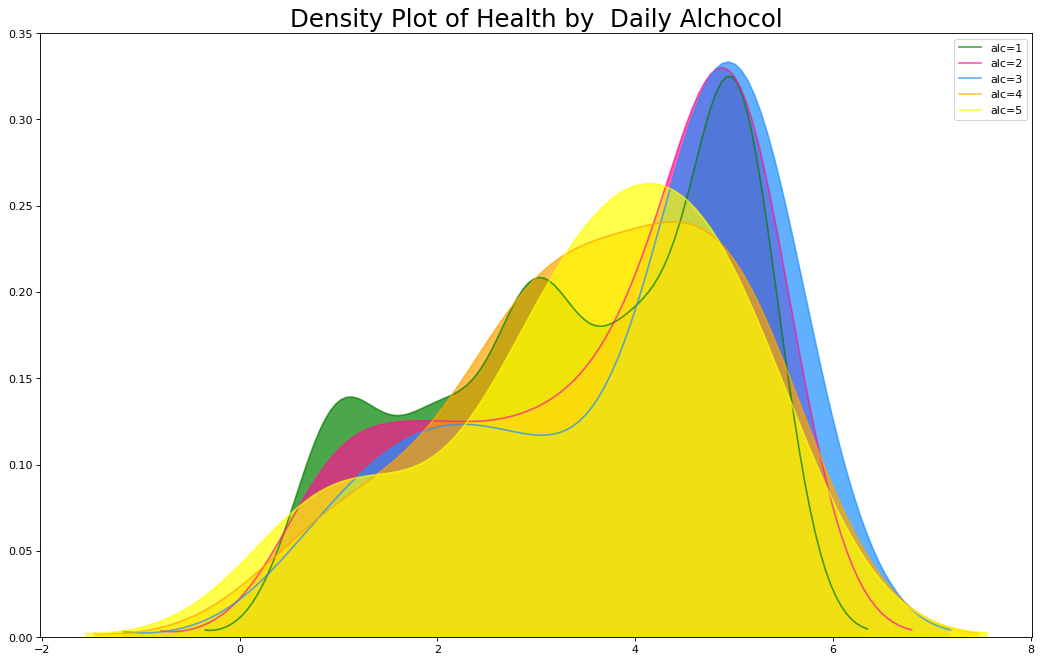

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(df.loc[df['Dalc'] == 1, "health"], shade=True, color="g", label="alc=1", alpha=.7)
sns.kdeplot(df.loc[df['Dalc'] == 2, "health"], shade=True, color="deeppink", label="alc=2", alpha=.7)
sns.kdeplot(df.loc[df['Dalc'] == 3, "health"], shade=True, color="dodgerblue", label="alc=3", alpha=.7)
sns.kdeplot(df.loc[df['Dalc'] == 4, "health"], shade=True, color="orange", label="alc=4", alpha=.7)
sns.kdeplot(df.loc[df['Dalc'] == 5, "health"], shade=True, color="yellow", label="alc=5", alpha=.7)

# Decoration
plt.title('Density Plot of Health by  Daily Alchocol', fontsize=22)
plt.legend()
plt.show()

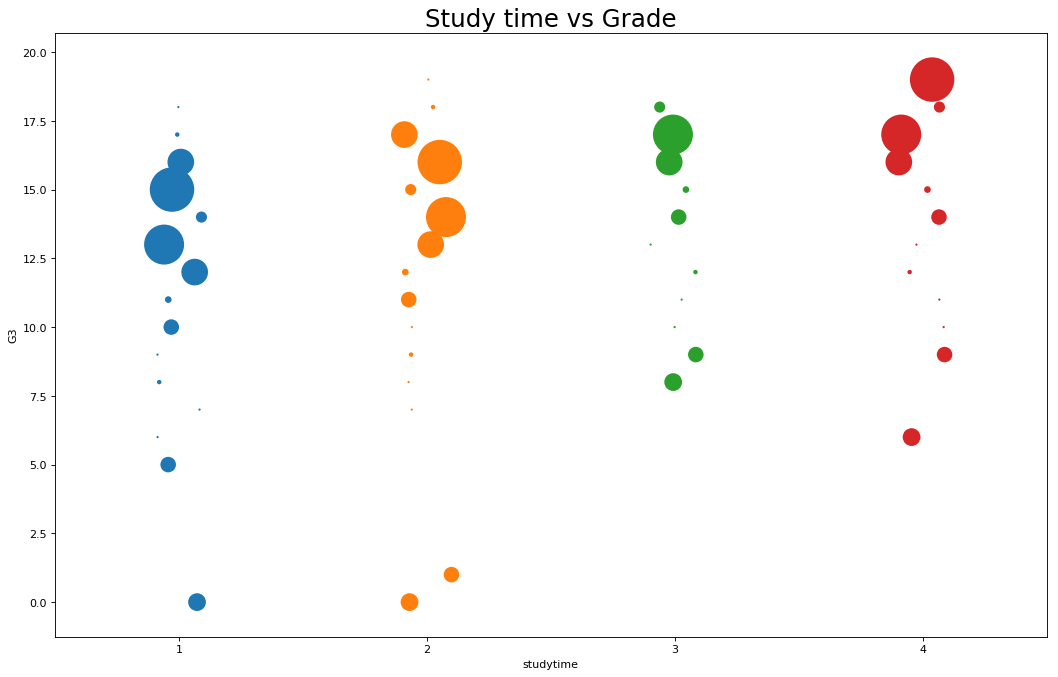

In [6]:
df_counts = df.groupby(['G3', 'studytime']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df_counts.studytime, df_counts.G3, size=df_counts.counts*2, ax=ax)

# Decorations
plt.title('Study time vs Grade', fontsize=22)
plt.show()

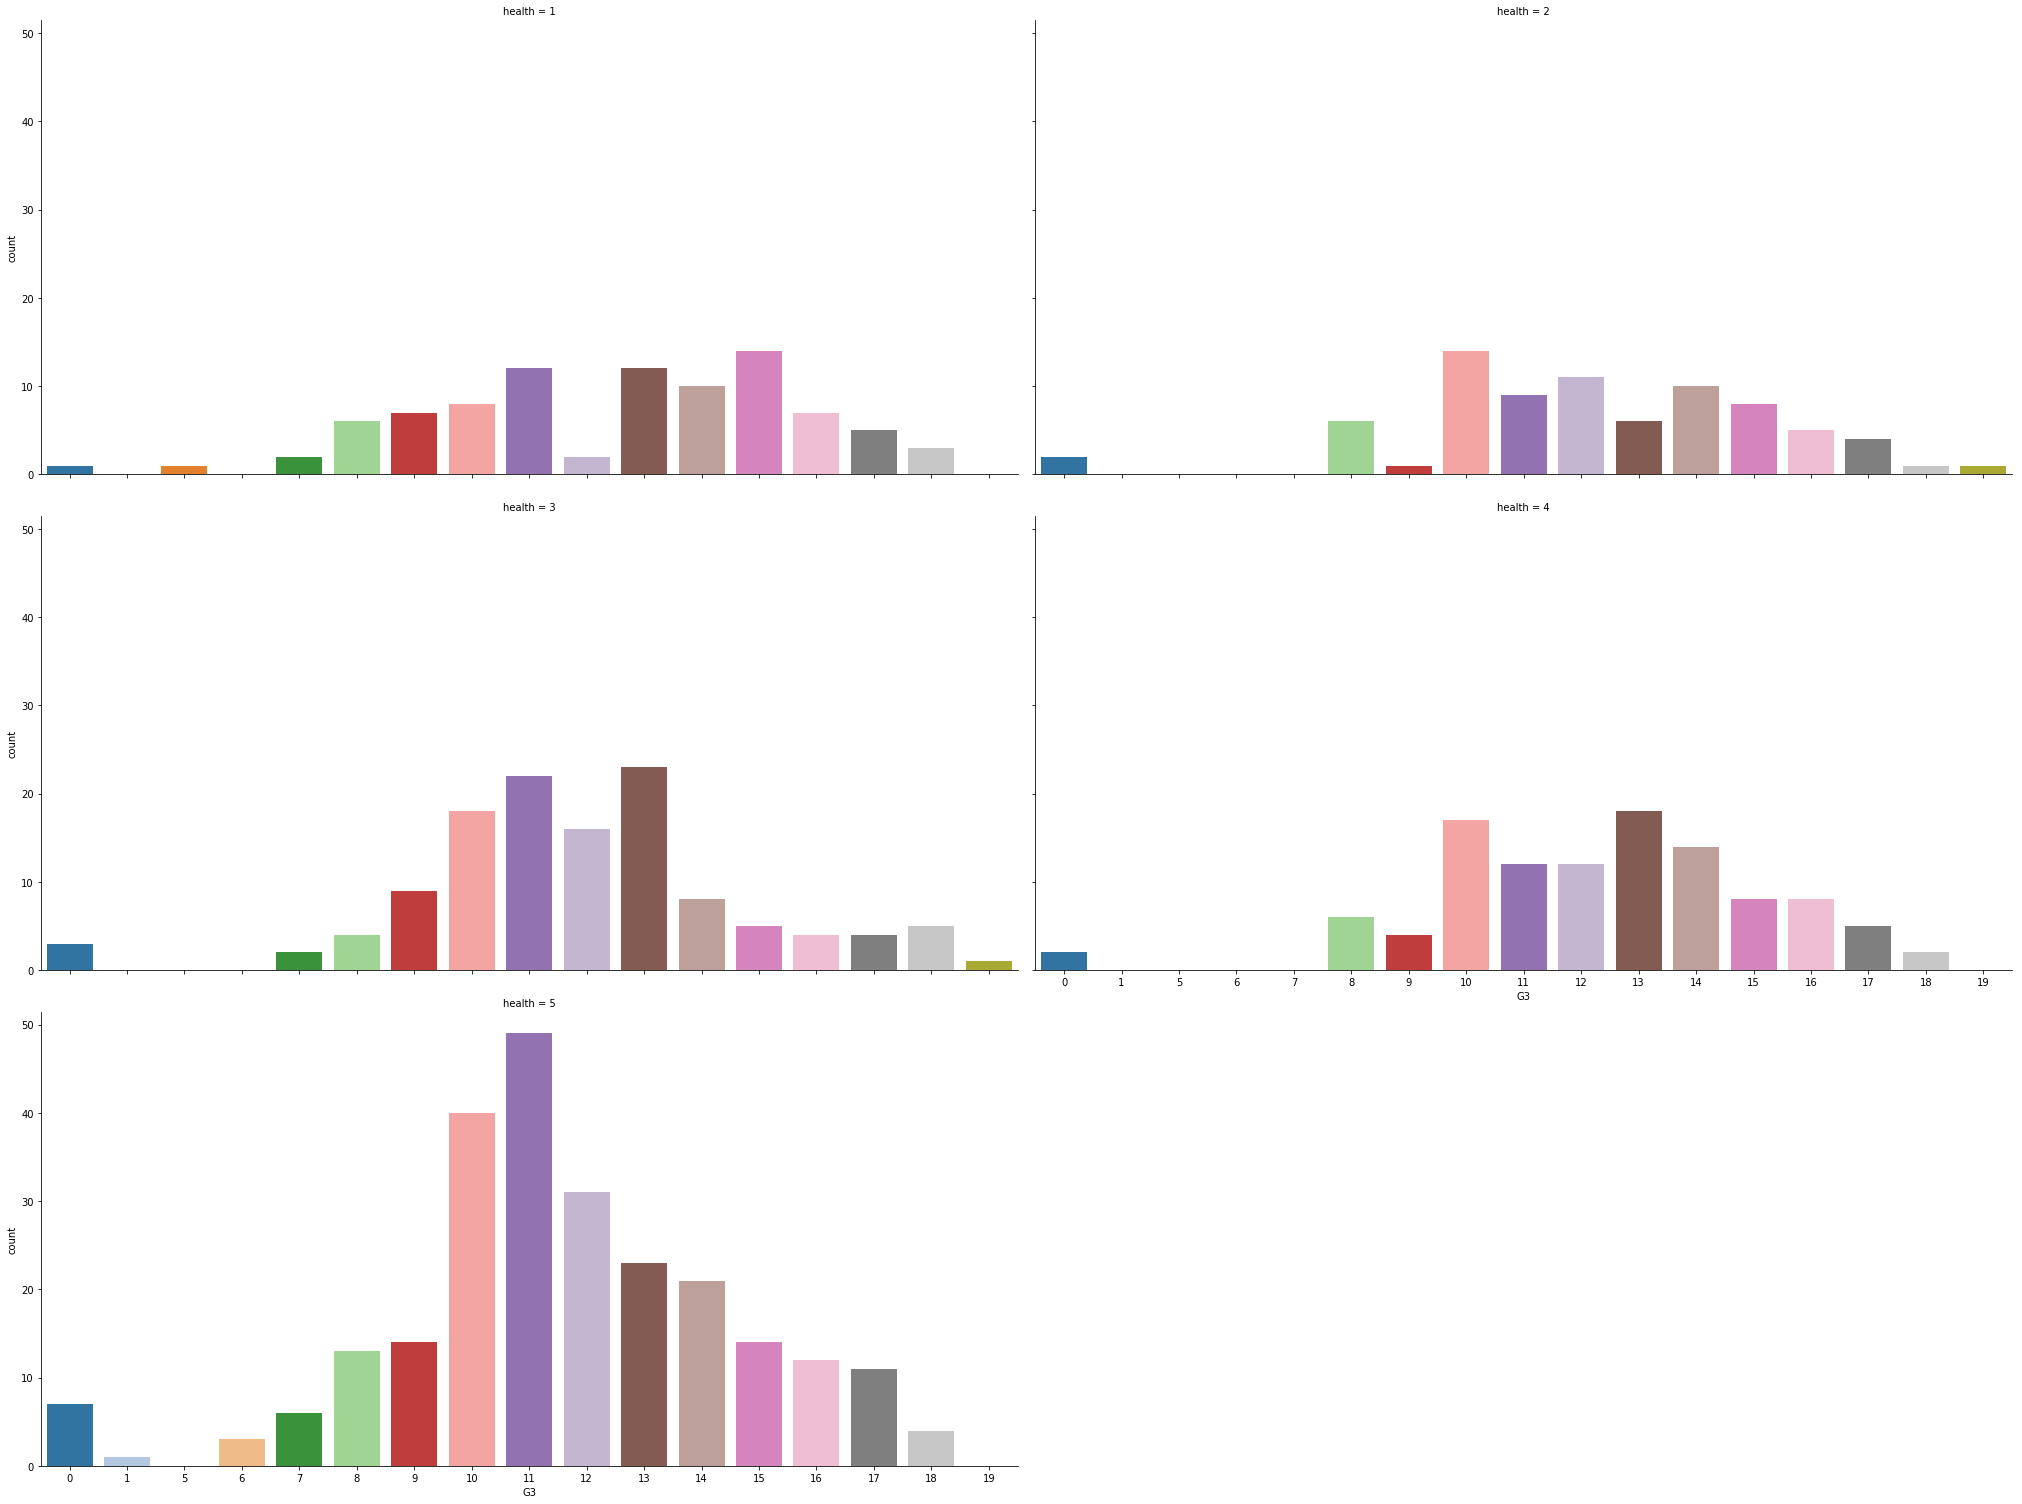

In [7]:
g = sns.catplot("G3",col='health',col_wrap=2,
           data=df[df.absences.notnull()],
           kind="count", height=7, aspect=2, 
                palette='tab20')
fig.suptitle('sf')
plt.show()